# 신경망을 위한 데이터 표현

### 텐서 : 머신 러닝의 기본 구성 요소로서 임의의 차원 개수를 가지는 행렬의 일반화된 모습입니다.

## 스칼라(0D 텐서)
하나의 숫자만을 담고 있는 텐서를 스칼라(스칼라 텐서, 0차원 텐서, 0D 텐서)라고 부릅니다. 넘파이에서는 float32나 float64 타입의 숫자가 스칼라 텐서 입니다.

ndim 속성을 사용하면 넘파이 배열의 축 개수를 확인할 수 있습니다. 텐서의 축 개수를 rank라고 부릅니다.

In [11]:
# scalar tensor
import numpy as np
x = np.array(12)

In [12]:
x

array(12)

In [13]:
x.ndim

0

## 벡터(1D 텐서)
숫자의 배열을 벡터 또는 1D 텐서라고 부릅니다. 1D 텐서는 딱 하나의 축을 가집니다.

In [14]:
# vector tensor
x = np.array([12,3,6,14,7]) # 5D vector

In [15]:
x

array([12,  3,  6, 14,  7])

In [16]:
x.ndim

1

## 행렬(2D 텐서)
벡터의 배열이 행렬 또는 2D 텐서입니다. 행과 열 2개의 축이 있습니다.

In [18]:
# matrix vector
x = np.array([[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]])

In [19]:
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [20]:
x.ndim

2

## 3D 텐서와 고차원 텐서
행렬들을 하나의 새로운 배열로 합치면 3D 텐서가 만들어 집니다.

In [21]:
# 3D tensor
x = np.array([[[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]],
             [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]],
             [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]]])

In [22]:
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [23]:
x.ndim

3

## 핵심 속성
<strong>축의 개수(rank) : </strong>3D 텐서에는 3개의 축이 있고, 행렬에는 2개의 축이 있습니다. numpy라이브러리에서는 ndim 속성에 저장되어 있습니다.<br>
<strong>크기(shape) : </strong>앞에 나온 행렬의 크기는 (3, 5)이고 3D 텐서의 크기는 (3, 3, 5)입니다. 벡터는 (5,)처럼 1개의 원소로 이루어진 튜플입니다.<br>
<strong>데이터 타입 : </strong>텐서에 포함된 데이터 타입입니다. 사전에 할당되어 연속된 메모리에 저장되어야 하여 가변 길이 문자열을 지원하지 않습니다.

## MNIST 데이터를 통한 텐서 확인

In [30]:
# MNIST 데이터셋 불러오기
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
train_images.ndim # 3D tensor

3

In [32]:
train_images.shape

(60000, 28, 28)

In [33]:
train_images.dtype

dtype('uint8')

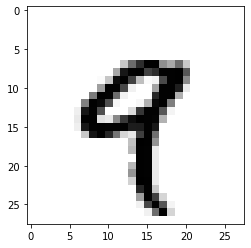

In [34]:
# 다섯번째 이미지 출력하기
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

## 넘파이로 텐서 조작하기

In [43]:
# 11번째에서 100번째까지 숫자를 선택하여 (90,28,28) 크기의 배열을 만듭니다.
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [44]:
# 더 자세한 표기법은 각 배열의 축을 따라 슬라이싱의 시작 인덱스와 마지막 인덱스를 지정하는 것입니다. :(콜론)은 전체 인덱스를 선택합니다.
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [45]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

test_images[10](test_imags의 11번째 이미지)와 my_slice[0](my_slice의 1번째 이미지)가 같은 것을 확인할 수 있다.

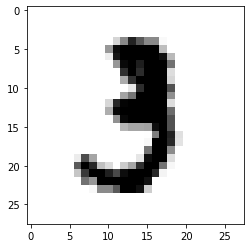

In [51]:
plt.imshow(my_slice[0],cmap=plt.cm.binary)
plt.show()

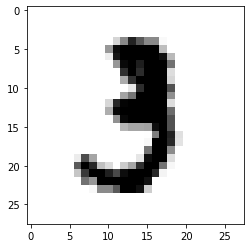

In [52]:
plt.imshow(train_images[10],cmap=plt.cm.binary)
plt.show()

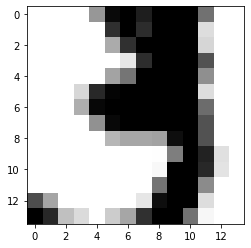

In [62]:
# 정중앙에 위차한 14*14 픽셀 조각을 이미지에서 잘라내어 표시
my_slice = train_images[:, 7:-7, 7:-7]
my_slice
plt.imshow(my_slice[10],cmap=plt.cm.binary)
plt.show()

## 배치 데이터
일반적으로 딥러닝에서 사용되는 모든 데이터 텐서의 0번째 축은 샘플 축입니다. 딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않습니다. 그 대신 데이터를 작은 배치로 나눕니다.

In [64]:
# MNIST 숫자 데이터에서 크기가 128인 배치 하나는 다음과 같습니다.
n=0
batch = train_images[:128]
# 다음 배치
batch = train_images[128:256]
# 다음 배치
batch = train_images[256:1024]
# n번째 배치
batch = train_images[128*n : 128*(n+1)]

이런 배치 데이터를 다룰 때는 0번째 축을 <strong>배치 축</strong> 또는 <strong>배치 차원</strong>이라고 부릅니다.